<a href="https://www.kaggle.com/code/abubakarsiddiquemahi/home-rent-prediction?scriptVersionId=124248444" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel("/kaggle/input/house-rent-prediction/Rent.xlsx")

#Data Analysis

In [3]:
df.head()

,area,rent
0,2000.0,31500.0
1,2100.0,35000.0
2,2500.0,41050.0
3,2250.0,36100.0
4,3000.0,52100.0


In [4]:
df.tail()

,area,rent
55,3100.0,54000.0
56,2750.0,48500.0
57,1800.0,25100.0
58,2200.0,31560.0
59,3100.0,51600.0


In [5]:
df.head(7)

,area,rent
0,2000.0,31500.0
1,2100.0,35000.0
2,2500.0,41050.0
3,2250.0,36100.0
4,3000.0,52100.0
5,1900.0,32500.0
6,1500.0,20000.0


In [6]:
df['rent'].head(6)

0    31500.0
1    35000.0
2    41050.0
3    36100.0
4    52100.0
5    32500.0
Name: rent, dtype: float64

In [7]:
df[5:10]

,area,rent
5,1900.0,32500.0
6,1500.0,20000.0
7,1850.0,24500.0
8,2700.0,48000.0
9,2100.0,31000.0


In [8]:
df.mean()

area     2289.000000
rent    37269.166667
dtype: float64

In [9]:
df.area.mean()

2289.0

In [10]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [11]:
df.area.std()

538.8805093801691

In [12]:
df.shape

(60, 2)

In [13]:
row, col = df.shape

In [14]:
row

60

In [15]:
col

2

In [16]:
df.isnull().sum()

area    0
rent    0
dtype: int64

#Data Visualization

Text(0.5, 1.0, 'Rent plot')

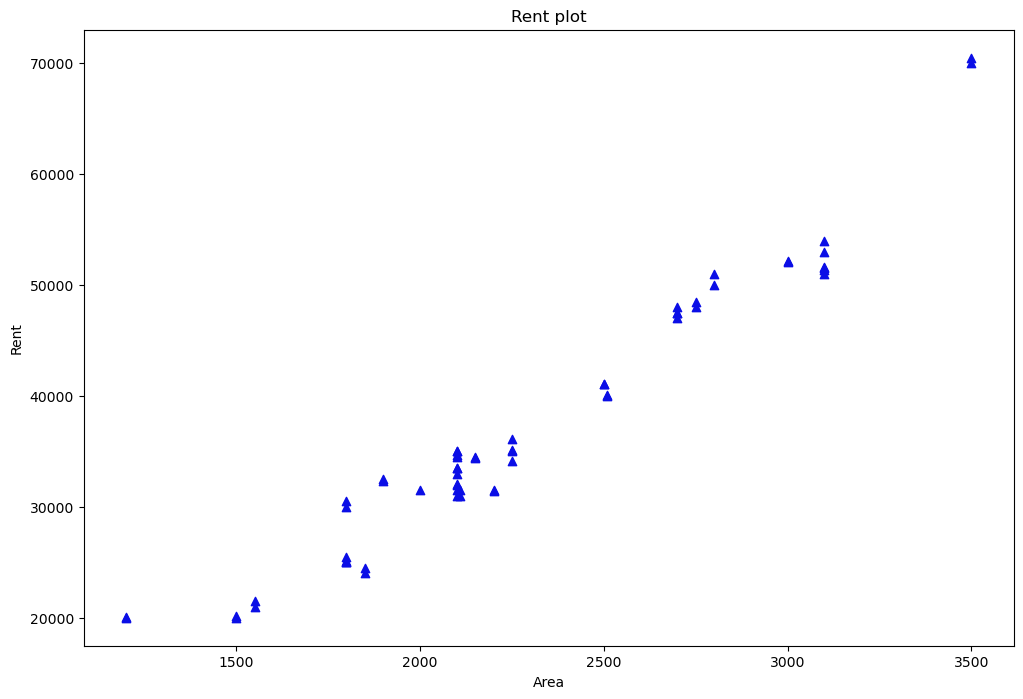

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(df.area, df.rent, marker='^', color='#0B0EE6')
plt.xlabel("Area", color="Black")
plt.ylabel("Rent")
plt.title("Rent plot")

In [18]:
x = df[["area"]]
y = df["rent"]

In [19]:
x.head()

,area
0,2000.0
1,2100.0
2,2500.0
3,2250.0
4,3000.0


In [20]:
#Split the dataste into train and test

In [21]:
from sklearn.model_selection import train_test_split as tts 

In [22]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [23]:
xtrain.head()

,area
40,2150.0
4,3000.0
43,2510.0
19,2700.0
34,3000.0


In [24]:
ytrain.head()

40    34400.0
4     52100.0
43    40000.0
19    47000.0
34    52200.0
Name: rent, dtype: float64

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [28]:
m = reg.coef_
m

array([20.68636687])

In [29]:
c = reg.intercept_
c

-10252.90474033673

In [30]:
x1 = 2100
y = m * x1 + c
y

array([33188.46568994])

In [31]:
reg.predict([[2100]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([33188.46568994])

In [32]:
pred = reg.predict(xtest)
pred

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

In [33]:
df['predicted result'] = reg.predict(x)

In [34]:
df.head()

,area,rent,predicted result
0,2000.0,31500.0,31119.829003
1,2100.0,35000.0,33188.465690
2,2500.0,41050.0,41463.012439
3,2250.0,36100.0,36291.420721
4,3000.0,52100.0,51806.195874


#Error Calculation

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mae = mean_absolute_error(ytest,pred)
mae

2103.50832336242

In [37]:
mse = mean_squared_error(ytest,pred)
mse

7677066.248378809

#Best Fit Line

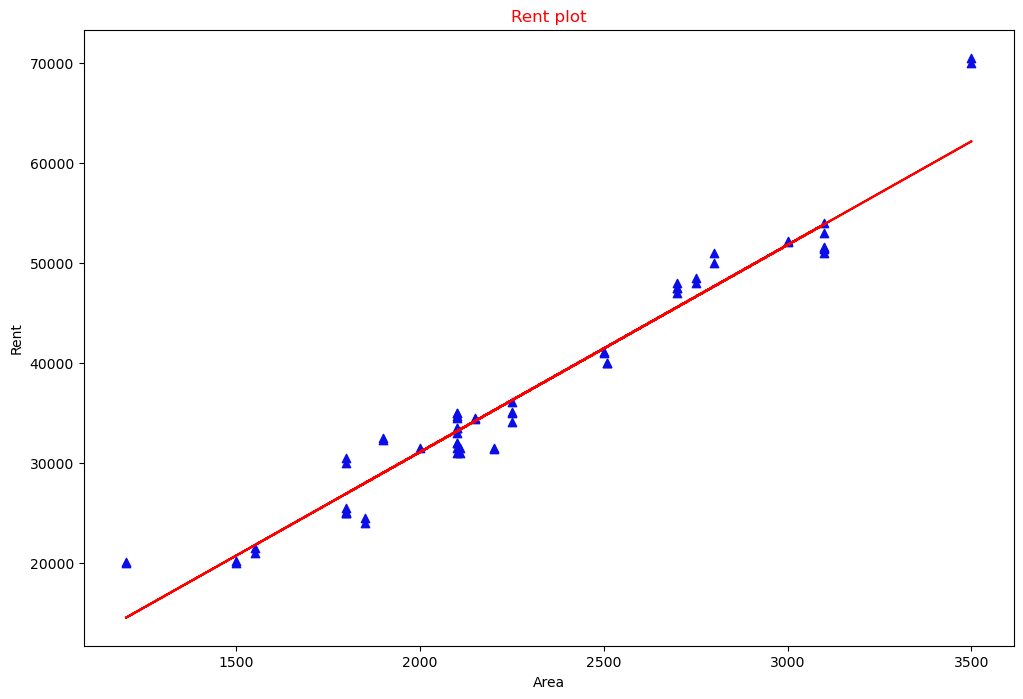

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(df.area , df.rent, marker='^' , color='#0B0EE6') # https://htmlcolorcodes.com/
plt.xlabel('Area', color='black')
plt.ylabel('Rent')
plt.title('Rent plot', color='red')
plt.plot(xtrain , reg.predict(xtrain), color='red')

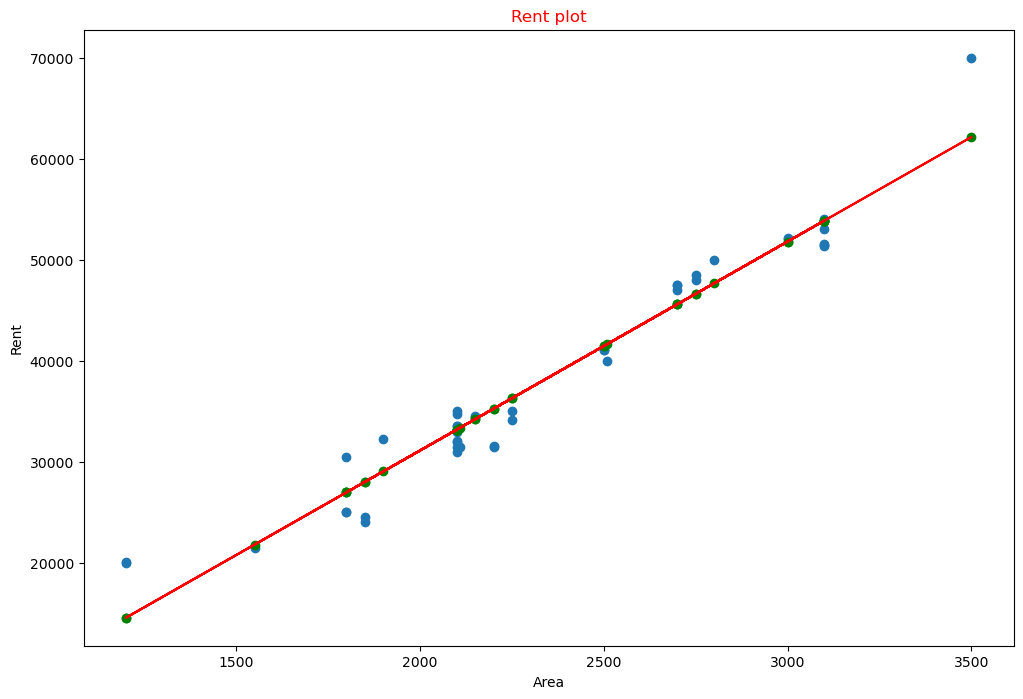

In [39]:
plt.figure(figsize=(12,8))
plt.xlabel('Area', color='black')
plt.ylabel('Rent')
plt.title('Rent plot', color='red')
plt.plot(xtrain , reg.predict(xtrain), color='red')
plt.scatter(xtrain, ytrain)
plt.scatter(xtrain, reg.predict(xtrain), color='green')

In [40]:
import warnings
warnings.filterwarnings('ignore')

reg.predict([[2500]])

array([41463.01243857])

#Score

In [41]:
reg.score(xtest, ytest)

0.9515542918540623

In [42]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.9515542918540623